In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gradient Descent (Advanced)

In this exercise, we will

- Code our Gradient Descent in vectorized form for a high-dimensional Loss Function
- Fine-tune your choice of # of epochs on GD

## 1. Our Dataset

We are going to study the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) and try to predict the **intensity of the disease** based on **10 quantitative features**, such as body-mass-index, age, etc. (regression problem)

In [138]:
X, y = datasets.load_diabetes(return_X_y = True, as_frame = True)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [139]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [140]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [141]:
print(y.max(), y.min())

346.0 25.0


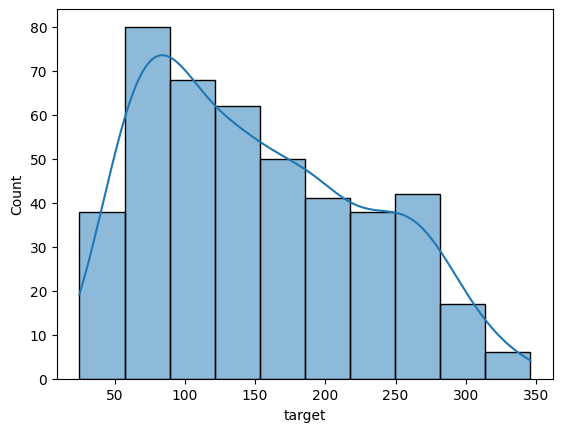

In [142]:
sns.histplot(y, kde = True);

## 2. Code a Vectorial Gradient Descent

We're modeling a linear regression $\hat{y} = X\beta$

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/vectorial-gradient.jpg">

So, first, let's add an "intercept" column of "ones" to our feature matrix X

In [143]:
# Let's add an intercept column of "ones" 
X = np.hstack((X, np.ones((X.shape[0], 1))))
X.shape

(442, 11)

In [144]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0


We've created a train/test split for you with `test_size=0.3` and `random_state=1` (so that we all have repeatable results)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)


Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store our main problem parameters below:

In [146]:
# n observations
n = X.shape[0] 
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# p features (including the intercept)
p = X.shape[1]

# Gradient Descent hyper-params
eta = .1
n_epochs= 100

❓ Initialize a $\beta$ vector of zeros of shape **p**

In [147]:
beta = np.zeros((p))

beta.shape

(11,)

❓ Using the vectorized formula given above, create a Gradient Descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of NumPy's matrix operations and broadcasting capabilities
- this shouldn't take more than 4 lines of code!

In [148]:
for epoch in range(n_epochs):
    residuals = np.dot(X_train,beta)-y_train
    gradient = 2/n_train*(np.dot(X_train.T,residuals))
    beta = beta - (eta*gradient)

In [40]:
#original solution
for epoch in range(n_epochs):
    gradient = 2 / n_train * np.dot(X_train.T, (np.dot(X_train, beta) - y_train))
    beta = beta - eta * gradient

In [149]:
print('Best ß: ', beta)

Best ß:  [ 13.88877812   1.6767504   45.64204342  31.67134515  13.17780485
   9.52749193 -28.21620784  30.03382058  41.48427879  27.12324669
 153.73815888]


In [150]:
beta.shape

(11,)

## Predict

❓Compute predictions on your test set (`y_pred`), and the resulting `loss_test` (MSE loss for OLS).

In [151]:
# YOUR CODE HERE
y_pred = np.dot(X_test, beta)
y_pred.shape

(133,)

In [152]:
test= mean_squared_error(y_test,y_pred)
test

4477.6183367564

In [153]:
test2= 1 / n_test * (y_pred - y_test).T.dot(y_pred - y_test)
test2

4477.6183367564

In [154]:
# YOUR CODE HERE
loss_test = np.sum((y_pred-y_test)**2)/n_test
loss_test


4477.6183367564

## Wrap these into a function called `gradient_decent`

❓ Wrap this logic into a function called `gradient_descent`, which takes as input some (`X_train`, `y_train`, `X_test`, `y_test`, `eta`, `n_epoch`) values, and returns:
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list called `loss_train_history`
- the values of the `loss_test` at each epoch as a list called `loss_test_history`
- (optional) make the function robust to call with only a train_set

In [87]:
def gradient_descent(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = []

    for epoch in range(n_epochs):
        residuals = (np.dot(X_train,beta)-y_train)
        gradient = 2/n_train* (np.dot(X_train.T, residuals))
        beta = beta - (eta*gradient)
        loss_train = mean_squared_error(y_train, (np.dot(X_train,beta)))
        loss_test= mean_squared_error(y_test, (np.dot(X_test, beta)))
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
    

    return beta, loss_train_history, loss_test_history

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=10000` and `eta=0.1` as was initially set
- Zoom in with `plt.ylim(ymin=2800, ymax=3000)` to see the behavior of the Loss Function on the test set
- What can you conclude? Should you always "descend" the gradient down to the absolute minimum?

In [88]:
eta

0.1

In [89]:
beta,loss_train_history,loss_test_history = gradient_descent(X_train,y_train, X_test, y_test, eta=eta, n_epochs=10000)

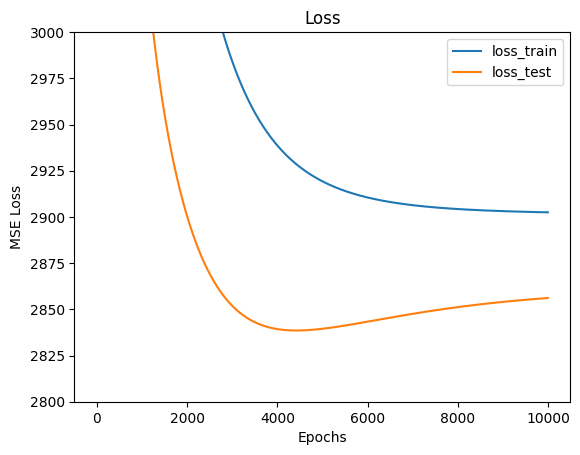

In [90]:
# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_test_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 2800, ymax = 3000)

# Generate legend
plt.legend()

❓ What do you notice?

> YOUR ANSWER HERE

❓Can you think of a method to improve the performance of your model? Take time to write it in pseudo-code below before looking at the hints.

<details>
    <summary>Hints</summary>

- We could decide to stop the GD as soon as the test loss starts to increase again.
- ⚠️ Yet we can't use the "test set" created initially to decide when to stop descending gradient; this would create data leakage! Never use your test set to optimize your model's `hyperparameters`.
- Create instead a train/test split **within** your current training set and optimize your early stopping based on the loss of this new test set only. This one is usually called a **validation set**. 
</details>

In [91]:
#pseudocode
def gradient_descent_pseudo(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = []

    for epoch in range(n_epochs):
        residuals = (np.dot(X_train,beta)-y_train)
        gradient = 2/n_train* (np.dot(X_train.T, residuals))
        beta = beta - (eta*gradient)
        loss_train = mean_squared_error(y_train, (np.dot(X_train,beta)))
        loss_test_new= mean_squared_error(y_test, (np.dot(X_test, beta)))
        if loss_test_new > loss_test:
            break
        
        loss_test= mean_squared_error(y_test, (np.dot(X_test, beta)))
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
    

    return beta, loss_train_history, loss_test_history

❓ Update your `gradient_descent` method based on the Hints above!

In [96]:
# YOUR CODE HERE
def gradient_descent_early_stopping(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = []

    for epoch in range(n_epochs):
        residuals = (np.dot(X_train,beta)-y_train)
        gradient = 2/n_train* (np.dot(X_train.T, residuals))
        beta = beta - (eta*gradient)
        loss_train = mean_squared_error(y_train, (np.dot(X_train,beta)))
        loss_test_new= mean_squared_error(y_test, (np.dot(X_test, beta)))
    
        if epoch > 0 and loss_test_new > loss_test:
            break
        
        loss_test= mean_squared_error(y_test, (np.dot(X_test, beta)))
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
    

    return beta, loss_train_history, loss_test_history

❓ Create your train/val set and try to improve your MSE with early stopping, using `random_state = 1`

It should stop earlier than before!

In [97]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

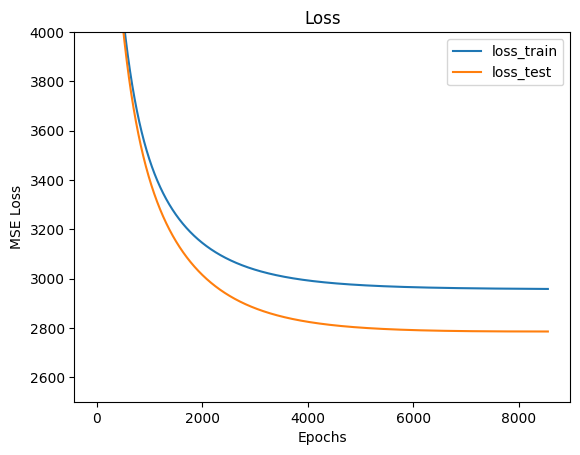

In [98]:
beta_es, loss_train_history, loss_val_history = gradient_descent_early_stopping(X_train_train, y_train_train, X_val, y_val, n_epochs = 10000, eta = .1)

# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_val_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 2500, ymax = 4000)

# Generate legend
plt.legend()

## Mini-Batch Descent

❓ Modify your gradient_descent function into a `minibatch_gradient_descent` one.

In [101]:
np.random.permutation([2,1,2,3,5,6,7])

array([1, 7, 5, 2, 3, 6, 2])

In [115]:
index = np.random.permutation(X_train.shape[0])
index

array([280, 285, 282,  81, 145, 153, 178, 246, 144, 199, 156, 165,  37,
       306, 219, 297,  59, 265,  48, 201,  73, 205, 104, 132,  60,  49,
       203, 293, 216,   9, 122, 289, 307,  62, 234,   1,  78,  45,  40,
       164, 308,  19, 218,   7, 248, 253, 226, 123, 140, 261,  93,  58,
        27,  65,  90, 257,  84, 112, 284,  23,  24, 263, 117,  94, 225,
       274, 175, 244,  11,  44, 209,  77, 255,  70, 134,  88, 266, 113,
       287, 217, 115, 139, 107,  53, 206,  74, 294, 190, 212, 127, 148,
       170, 300, 200, 290,  43,  39,  98, 119, 268,  33, 147,  29, 224,
         2,   0, 301, 137, 155,  57, 171,  17, 259, 189, 177, 295, 111,
       286, 162, 138, 103,  92, 271, 239,  76, 116, 262, 159,  25, 158,
        13,  95, 207, 143, 146,  10, 260, 227,   6, 288, 204,  36, 303,
       254,   3, 179, 149,  46, 163,  97, 108,   4, 222,  61, 100,  30,
       277, 304,  16,  35, 185, 181,  12,  72, 180,  51,  63, 183, 188,
       247, 281, 223, 157, 172,  75, 120, 272, 250,  41,  42, 12

In [117]:
X_train[index]

array([[ 3.08108295e-02,  5.06801187e-02, -8.36157828e-03, ...,
        -2.95264268e-02,  5.69117993e-02,  1.00000000e+00],
       [-5.27375548e-02, -4.46416365e-02, -8.16893766e-04, ...,
        -3.58161926e-02,  1.96328371e-02,  1.00000000e+00],
       [ 3.80759064e-02,  5.06801187e-02, -2.99178198e-02, ...,
        -1.29086832e-02,  3.06440941e-03,  1.00000000e+00],
       ...,
       [ 3.08108295e-02,  5.06801187e-02, -3.42290681e-02, ...,
         3.54587042e-02,  8.59065477e-02,  1.00000000e+00],
       [ 3.80759064e-02,  5.06801187e-02, -9.43939036e-03, ...,
        -2.59531106e-02,  1.06617082e-01,  1.00000000e+00],
       [ 4.53409833e-02, -4.46416365e-02, -6.20595414e-03, ...,
         4.28970360e-02, -3.83566597e-02,  1.00000000e+00]])

In [121]:
list(range(0, n_train,16))

[0,
 16,
 32,
 48,
 64,
 80,
 96,
 112,
 128,
 144,
 160,
 176,
 192,
 208,
 224,
 240,
 256,
 272,
 288,
 304]

In [122]:
X_train.shape

(309, 11)

In [127]:
def minibatch_gradient_descent(X_train, y_train, X_test, y_test, batch_size = 16, eta = eta, n_epochs = n_epochs):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]

    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = []

    if isinstance(y_train, pd.Series):
        y_train = y_train.to_numpy()

    for epoch in range(n_epochs):
        # Shuffle your (X_train, y_train) dataset
        random = np.random.permutation(n_train)
        X_random = X_train[random]
        y_random = y_train[random]

        # Loop over your dataset in mini-batches, and for each mini-batch update your beta
        for i in range(0, n_train,batch_size):
            residuals = (np.dot(X_random[i:i+batch_size],beta)-y_random[i:i+batch_size])
            gradient = 2/batch_size* (np.dot(X_random[i:i+batch_size].T, residuals))
            beta = beta - (eta*gradient)

        # Keep track of loss histories per epoch
        loss_train = mean_squared_error(y_random, (np.dot(X_random,beta)))           
        loss_test= mean_squared_error(y_test, (np.dot(X_test, beta)))
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    return beta, loss_train_history, loss_test_history

❓ Plot the evolution of your train and val losses per epoch. What if you chose minibatch = 1?

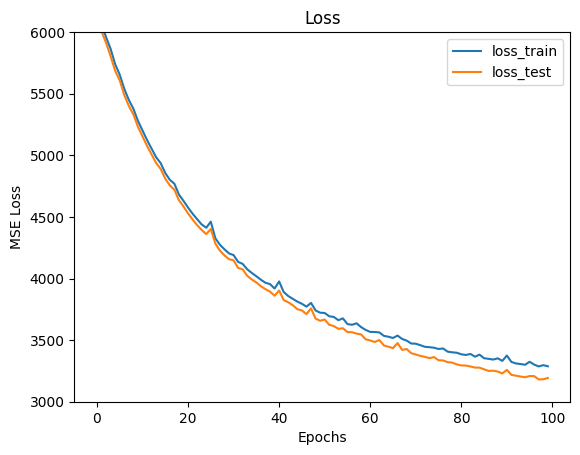

In [135]:
beta_es, loss_train_history, loss_val_history = minibatch_gradient_descent(X_train_train, y_train_train, X_val, y_val,batch_size=16,eta = .1, n_epochs=100)

# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_val_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 3000, ymax = 6000)

# Generate legend
plt.legend()

❓ How would you adjust the early stopping criteria to these fluctuations?

<details>
    <summary>Hint</summary>

To avoid early stopping too early due to the stochastic nature of the mini-batch descent, we could add a "patience" term to stop only after the val loss is increased for a sustained period of "patience" # of epochs.
</details>

## Conclusion: a new way to check for overfitting

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/underfitting_overfitting_at_a_glance.webp" width=800>

📚 Read more about:

- [Underfitting and overfitting](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)
- [Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)